In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

red_palette = ["#c8102e", "#08415c", "#2e2e2e","#6b818c","#f1bf98"]

sns.set_palette(palette=red_palette)

def read_wandb_csv(file_path):
    """
    Reads a csv file exported from Weights & Biases (wandb) and returns a pandas dataframe.
    
    Args:
    file_path (str): The path to the csv file.
    
    Returns:
    pandas.DataFrame: The dataframe containing the data from the csv file.
    """
    df = pd.read_csv(file_path)
    return df

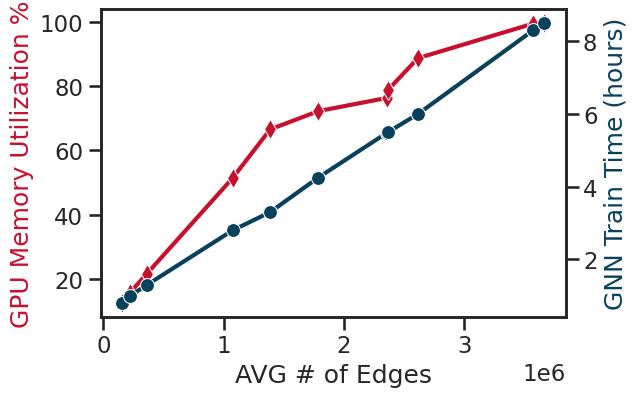

In [97]:
fig, ax1 = plt.subplots(1,1,figsize=(6,4))
paper_rc = {'lines.linewidth': 3, 'lines.markersize': 10}                  
sns.set_context("talk", rc = paper_rc) 
ax2 = ax1.twinx()
sns.lineplot(data=num,x="AVG # of Edges",y="GNN Memory Utilization",color="#c8102e",ax=ax1,markers=True,marker='d',sizes=100)
ax1.set(xlabel='AVG # of Edges')
ax1.set_ylabel('GPU Memory Utilization %',color="#c8102e")

sns.lineplot(data=num,x="AVG # of Edges",y="GNN Train Time",ax=ax2,color="#08415c",markers=True,marker='o',sizes=100)
ax2.set(xlabel='AVG # of Edges')
ax2.set_ylabel("GNN Train Time (hours)",color="#08415c")
fig.savefig("NumEdgesMemory.png",bbox_inches='tight',dpi=300)

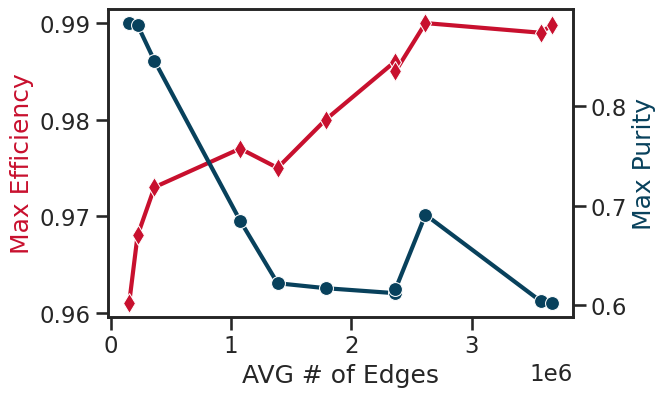

In [98]:
fig, ax1 = plt.subplots(1,1,figsize=(6,4))
paper_rc = {'lines.linewidth': 3, 'lines.markersize': 10}                  
sns.set_context("talk", rc = paper_rc) 
ax2 = ax1.twinx()
sns.lineplot(data=num,x="AVG # of Edges",y="Max eff",color="#c8102e",ax=ax1,markers=True,marker='d',sizes=100)
ax1.set(xlabel='AVG # of Edges')
ax1.set_ylabel('Max Efficiency',color="#c8102e")

sns.lineplot(data=num,x="AVG # of Edges",y="Max pur",ax=ax2,color="#08415c",markers=True,marker='o',sizes=100)
ax2.set(xlabel='AVG # of Edges')
ax2.set_ylabel("Max Purity",color="#08415c")
fig.savefig("NumEdgesEffPur.png",bbox_inches='tight',dpi=300)

In [9]:
eff=read_wandb_csv("dataWandb/w.6_efficiency.csv")
pur=read_wandb_csv("dataWandb/w.6_purity.csv")
train=read_wandb_csv("dataWandb/w.6_train_loss.csv")
val=read_wandb_csv("dataWandb/w.6_validation_loss.csv")

effR=read_wandb_csv("8gpus/8 GPU efficiency.csv")
purR=read_wandb_csv("8gpus/8 GPU purity.csv")
trainR=read_wandb_csv("8gpus/8 GPU train loss.csv")
valR=read_wandb_csv("8gpus/8 GPU validation loss.csv")

f_column = effR["2_4_w=0.6 - eff"]
eff = pd.concat([eff,f_column], axis = 1)
f_column = purR["2_4_w=0.6 - total_pur"]
pur = pd.concat([pur,f_column], axis = 1)
f_column = trainR["2_4_w=0.6 - train_loss"]
train = pd.concat([train,f_column], axis = 1)
f_column = valR["2_4_w=0.6 - val_loss"]
val = pd.concat([val,f_column], axis = 1)


eff = eff.rename(columns={'1_1_w=0.6 - eff':'1 GPU','1_4_w=0.6 - eff':'4 GPUs','2_4_w=0.6 - eff':'8 GPUs'})
pur = pur.rename(columns={'1_1_w=0.6 - total_pur':'1 GPU','1_4_w=0.6 - total_pur':'4 GPUs','2_4_w=0.6 - total_pur':'8 GPUs'})
train = train.rename(columns={'1_1_w=0.6 - train_loss':'1 GPU','1_4_w=0.6 - train_loss':'4 GPUs','2_4_w=0.6 - train_loss':'8 GPUs'})
val = val.rename(columns={'1_1_w=0.6 - val_loss':'1 GPU','1_4_w=0.6 - val_loss':'4 GPUs','2_4_w=0.6 - val_loss':'8 GPUs'})

In [10]:
red_palette = ["#c8102e", "#08415c", "#2e2e2e","#6b818c","#f1bf98"]

sns.set_palette(palette=red_palette)


In [19]:
def plotw(dataframe,yname, loc):
    fig, ax1 = plt.subplots(1,1,figsize=(6,4))
    paper_rc = {'lines.linewidth': 3, 'lines.markersize': 10}                  
    sns.set_context("talk", rc = paper_rc) 

    ax=sns.lineplot(data=dataframe[['1 GPU','4 GPUs','8 GPUs']],dashes=False,linewidth=2)

    ax.set(xlabel='Epoch', ylabel=yname)
    plt.legend(loc=loc,frameon=False)
    #ax.legend([],[],frameon=False)
    fig.savefig("ddp_"+yname+".png",bbox_inches='tight',dpi=300)
    plt.show()

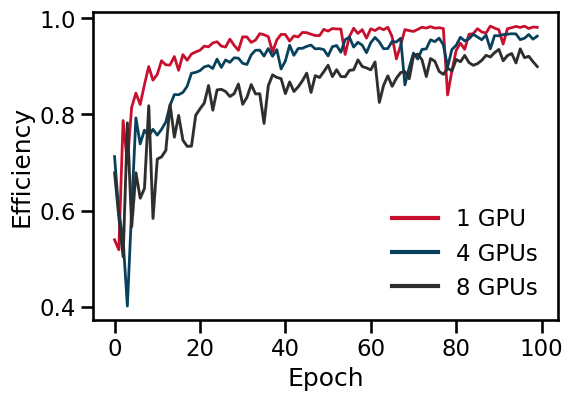

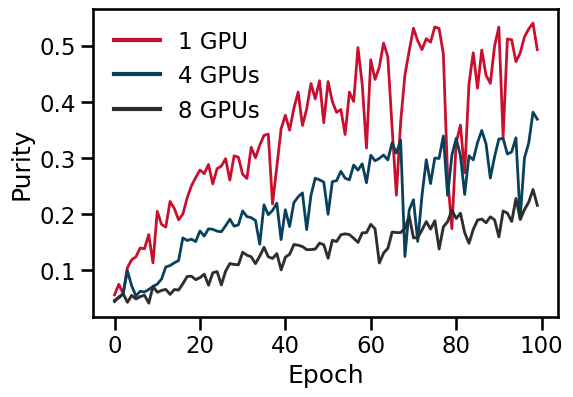

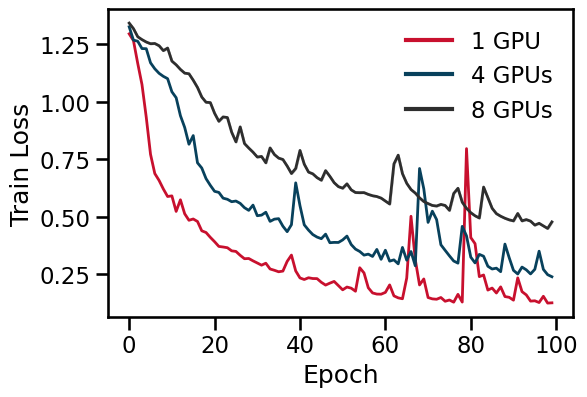

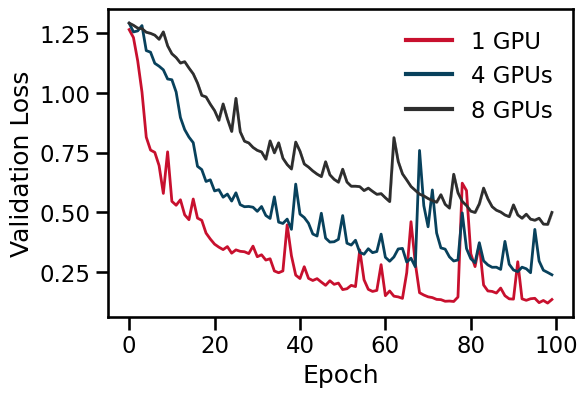

In [20]:
plotw(eff,'Efficiency','lower right')
plotw(pur,  'Purity','upper left')
plotw(train,'Train Loss','upper right')
plotw(val,  'Validation Loss','upper right')

In [23]:
effM=read_wandb_csv("miniexpIv/Minibatch efficiency.csv")
purM=read_wandb_csv("miniexpIv/Minibatch purity.csv")
trainM=read_wandb_csv("miniexpIv/Minibatch train loss.csv")
valM=read_wandb_csv("miniexpIv/Minibatch validation loss.csv")

effR=read_wandb_csv("miniexpIv/Regular batch efficiency.csv")
purR=read_wandb_csv("miniexpIv/Regular batch purity.csv")
trainR=read_wandb_csv("miniexpIv/Regular batch train loss.csv")
valR=read_wandb_csv("miniexpIv/Regular batch validation loss.csv")

f_column = effR["1_1_w=4 - eff"]
effM = pd.concat([effM,f_column], axis = 1)
f_column = purR["1_1_w=4 - total_pur"]
purM = pd.concat([purM,f_column], axis = 1)
f_column = trainR["1_1_w=4 - train_loss"]
trainM = pd.concat([trainM,f_column], axis = 1)
f_column = valR["1_1_w=4 - val_loss"]
valM = pd.concat([valM,f_column], axis = 1)

eff = effM.rename(columns={'1_1_shadow_w=4_4_10_2048 - eff':'1 GPU mini','1_2_shadow_w=4_4_10_2048 - eff':'2 GPUs mini','1_4_shadow_w=4_4_10_2048 - eff':'4 GPUs mini','1_1_w=4 - eff':'1 GPU full'})
pur = purM.rename(columns={'1_1_shadow_w=4_4_10_2048 - total_pur':'1 GPU mini','1_2_shadow_w=4_4_10_2048 - total_pur':'2 GPUs mini','1_4_shadow_w=4_4_10_2048 - total_pur':'4 GPUs mini','1_1_w=4 - total_pur':'1 GPU full'})
train = trainM.rename(columns={'1_1_shadow_w=4_4_10_2048 - train_loss':'1 GPU mini','1_2_shadow_w=4_4_10_2048 - train_loss':'2 GPUs mini','1_4_shadow_w=4_4_10_2048 - train_loss':'4 GPUs mini','1_1_w=4 - train_loss':'1 GPU full'})
val = valM.rename(columns={'1_1_shadow_w=4_4_10_2048 - val_loss':'1 GPU mini','1_2_shadow_w=4_4_10_2048 - val_loss':'2 GPUs mini','1_4_shadow_w=4_4_10_2048 - val_loss':'4 GPUs mini','1_1_w=4 - val_loss':'1 GPU full'})

In [39]:
def plotw(dataframe,yname, loc):
    sns.set_style("ticks")
    fig, ax1 = plt.subplots(1,1,figsize=(6,4))
    paper_rc = {'lines.linewidth': 3, 'lines.markersize': 10}                  
    sns.set_context("talk", rc = paper_rc) 
    ax=sns.lineplot(data=dataframe[['1 GPU mini','2 GPUs mini','4 GPUs mini','1 GPU full']],dashes=False,linewidth=2)
    ax=sns.lineplot(data=dataframe[['1 GPU mini','1 GPU full']],dashes=False,linewidth=2)
    #ax=sns.lineplot(data=dataframe[['1 GPU mini','2 GPUs mini','4 GPUs mini']],dashes=False,linewidth=2)

    ax.set(xlabel='Epoch', ylabel=yname)
    plt.legend(loc=loc)
    fig.savefig("mini_"+yname+".png",bbox_inches='tight',dpi=300)

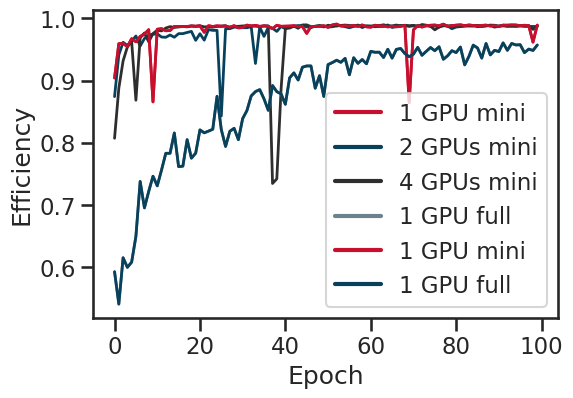

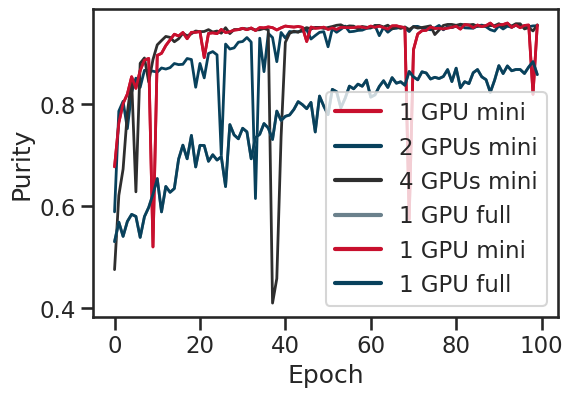

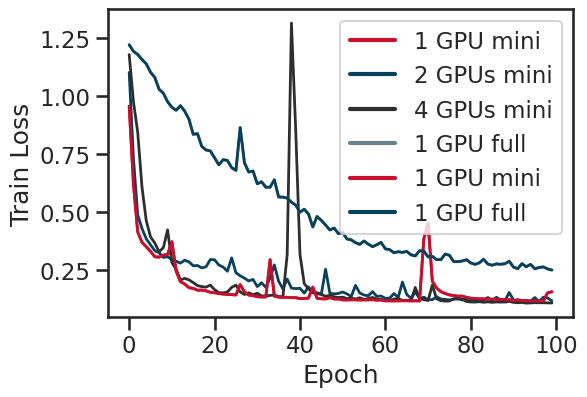

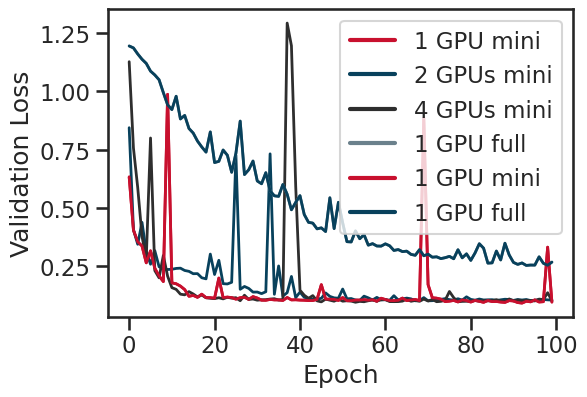

In [40]:
plotw(eff,'Efficiency','lower right')
plotw(pur,  'Purity','lower right')
plotw(train,'Train Loss','upper right')
plotw(val,  'Validation Loss','upper right')

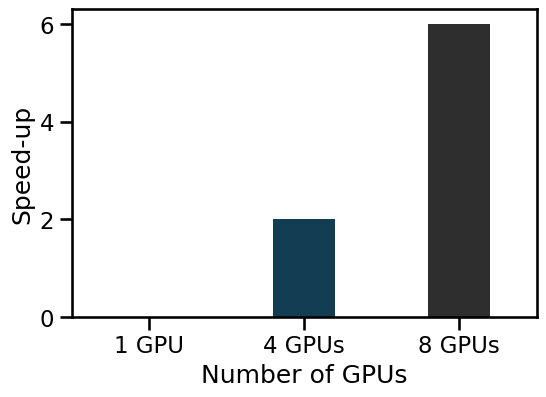

In [23]:
fig, ax1 = plt.subplots(1,1,figsize=(6,4))
d = {'Number of GPUs':['1 GPU','4 GPUs','8 GPUs'],'Speed-up':[0,2,6]}
df = pd.DataFrame(data=d)
df
sns.barplot(data=df,x='Number of GPUs',y='Speed-up',width=0.4)
fig.savefig("speedup8.png",bbox_inches='tight',dpi=300)

<Axes: xlabel='Number of GPUs', ylabel='Speed-up'>

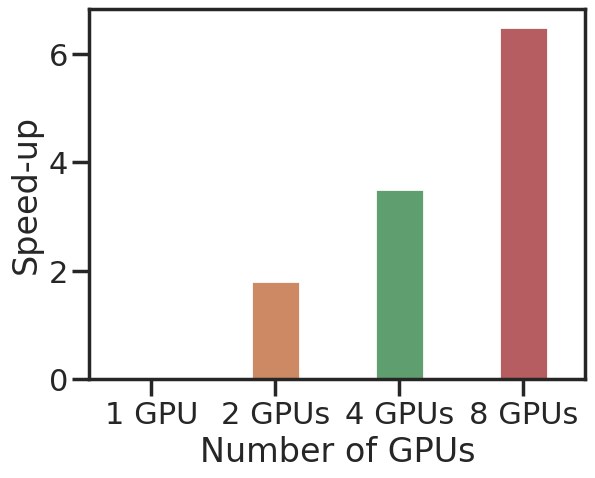

In [76]:
sns.set_context("poster")
d = {'Number of GPUs':['1 GPU','2 GPUs','4 GPUs','8 GPUs'],'Speed-up':[0,1.8,3.5,6.5]}
df = pd.DataFrame(data=d)
df
sns.barplot(data=df,x='Number of GPUs',y='Speed-up',width=0.4)

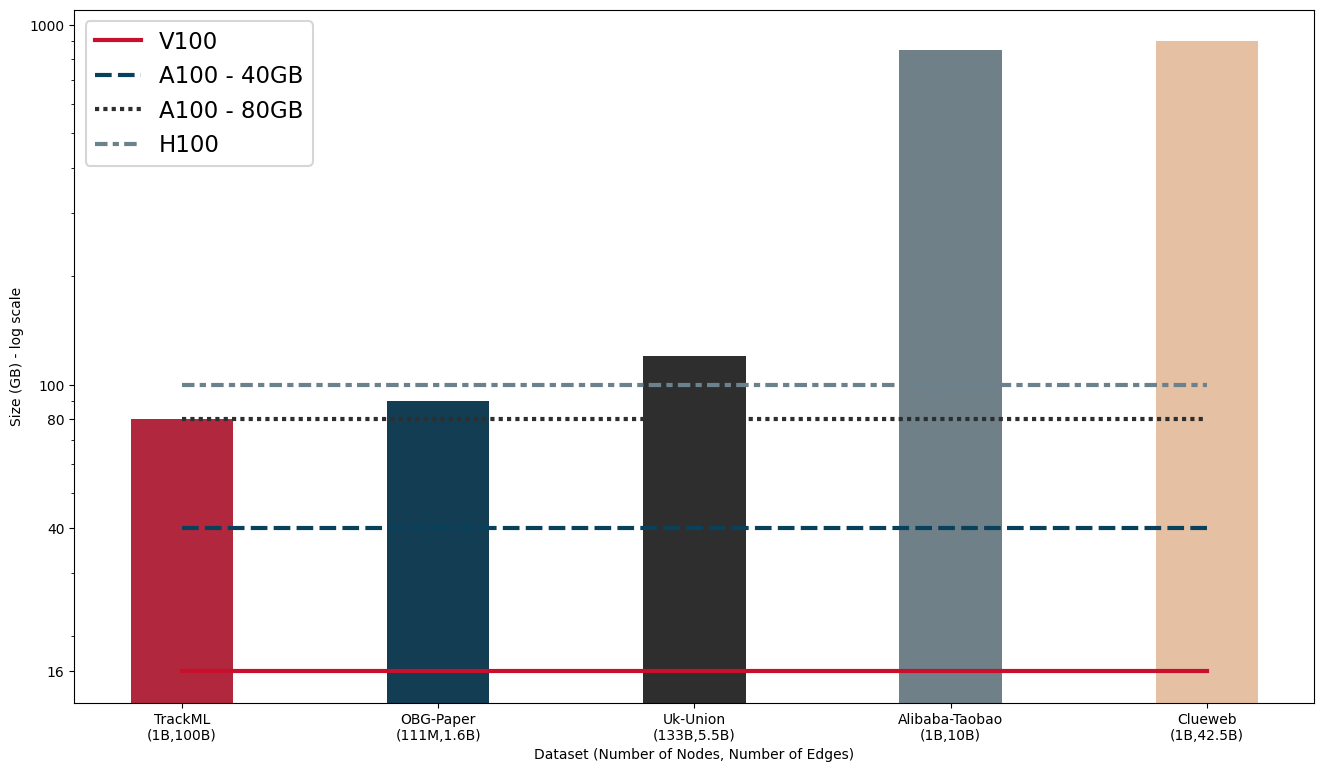

In [3]:
import numpy as np
fig, ax = plt.subplots(1,1,figsize=(16,9))
paper_rc = {'lines.linewidth': 3, 'lines.markersize': 10}                  
sns.set_context("talk", rc = paper_rc) 
red_palette = ["#c8102e", "#08415c", "#2e2e2e","#6b818c","#f1bf98"]
sns.set_palette(palette=red_palette)
d = {'Dataset':['TrackML\n(1B,100B)','OBG-Paper\n(111M,1.6B)','Uk-Union\n(133B,5.5B)','Alibaba-Taobao\n(1B,10B)','Clueweb\n(1B,42.5B)'],'Size (GB)':[80, 90, 120, 850, 900]}
df = pd.DataFrame(data=d)
g = sns.barplot(data=df,x='Dataset',y='Size (GB)',width=0.4)
g.set(yscale="log")
sample_count=[4,16,40,80,100,1000]
g.set(yticks=sample_count)
g.set(yticklabels=sample_count)
d = {'Dataset':['TrackML\n(1B,100B)','OBG-Paper\n(111M,1.6B)','Uk-Union\n(133M,5.5B)','Alibaba-Taobao\n(1B,10B)','Clueweb\n(1B,42.5B)'],
     'V100':[16, 16, 16, 16, 16], 'A100 - 40GB':[40, 40, 40, 40, 40], 'A100 - 80GB':[80, 80, 80, 80, 80], 'H100':[100, 100, 100, 100, 100],}
ax.set_ylabel('Size (GB) - log scale')
ax.set_xlabel('Dataset (Number of Nodes, Number of Edges)')
dfl = pd.DataFrame(d)
sns.lineplot(data=dfl,linestyle='--')
fig.savefig("graph_size.png",bbox_inches='tight',dpi=300)